<a href="https://colab.research.google.com/github/yuji-sgs/web-optimization/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Ë°®Á¥ô](https://www.oreilly.co.jp/books/images/picture978-4-87311-916-8.gif)

„Åì„ÅÆ„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„ÅØ„Ç™„É©„Ç§„É™„Éº„Éª„Ç∏„É£„Éë„É≥„Çà„ÇäÁô∫Ë°å„ÅÆÊõ∏Á±ç[„Äé„Ç¶„Çß„ÉñÊúÄÈÅ©Âåñ„Åß„ÅØ„Åò„ÇÅ„ÇãÊ©üÊ¢∞Â≠¶Áøí„ÄèÔºàÈ£ØÂ°ö ‰øÆÂπ≥„ÄÄËëóÔºâ](https://www.oreilly.co.jp/books/9784873119168/)„ÅÆ„Çµ„É≥„Éó„É´„Ç≥„Éº„Éâ„Åß„Åô„ÄÇ„Ç≥„Éº„Éâ„ÅÆËß£Ë™¨Á≠â„ÅØÊõ∏Á±ç„Çí„ÅîÂèÇÁÖß„Åè„Å†„Åï„ÅÑ„ÄÇ„Å™„Åä„ÄÅ„Åì„ÅÆ„Ç≥„Éº„Éâ„ÇíÂãï‰Ωú„Åï„Åõ„ÅüÁµêÊûú„Å´„Å§„ÅÑ„Å¶„ÄÅËëóËÄÖ„Åä„Çà„Å≥„Ç™„É©„Ç§„É™„Éº„Éª„Ç∏„É£„Éë„É≥„ÅØ‰∏ÄÂàá„ÅÆË≤¨‰ªª„ÇíË≤†„ÅÑ„Åæ„Åõ„Çì„ÄÇ

# 2Á´†: Á¢∫ÁéáÁöÑ„Éó„É≠„Ç∞„É©„Éü„É≥„Ç∞: „Ç≥„É≥„Éî„É•„Éº„Çø„ÅÆÂä©„Åë„ÇíÂÄü„Çä„Çã

In [1]:
# ÂøÖË¶Å„Å™„É¢„Ç∏„É•„Éº„É´„ÅÆË™≠„ÅøËæº„Åø
import numpy as np
from matplotlib import pyplot as plt
import pymc as pm

plt.style.use('grayscale')
plt.style.use('seaborn-whitegrid')
np.random.seed(0)

<ipython-input-1-89b4c6d4cdb1>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Áµ±Ë®à„É¢„Éá„É´„ÅÆË®òËø∞„Å®„Çµ„É≥„Éó„É™„É≥„Ç∞„ÅÆÂÆüË°å

In [2]:
N = 40  # „Ç¢„É™„Çπ„ÅÆ„Éá„Ç∂„Ç§„É≥AÊ°à„ÅÆË°®Á§∫Êï∞
a = 2   # „Ç¢„É™„Çπ„ÅÆ„Éá„Ç∂„Ç§„É≥AÊ°à„ÅÆ„ÇØ„É™„ÉÉ„ÇØÊï∞

with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1)
  # theta = pm.Beta('theta', alpha=1, beta=1)
  obs = pm.Binomial('a', p=theta, n=N, observed=a)
  trace = pm.sample(5000, chains=2)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


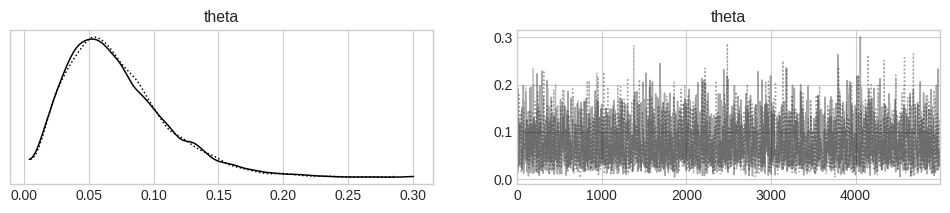

In [3]:
# ‰∫ãÂæåÂàÜÂ∏É„Åã„Çâ„ÅÆ„Çµ„É≥„Éó„É´„ÅÆÂèØË¶ñÂåñ
with model:
  pm.plot_trace(trace)

In [4]:
with model:
  print(pm.summary(trace, hdi_prob=0.95))

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
theta  0.071  0.039     0.009      0.146      0.001      0.0    3506.0   

       ess_tail  r_hat  
theta    4059.0    1.0  


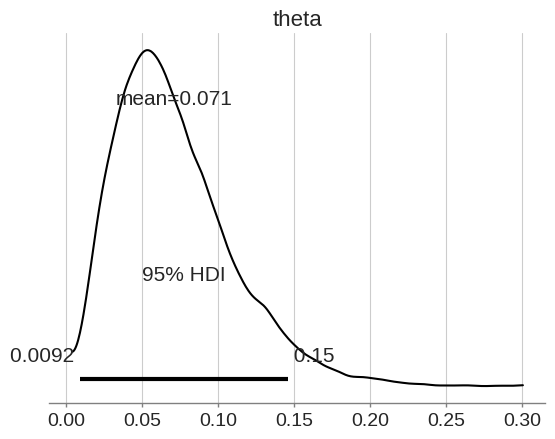

In [5]:
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

In [6]:
# ‰ªÆË™¨Ôºö„Ç¢„É™„Çπ„ÅÆ„Éá„Ç∂„Ç§„É≥AÊ°à„ÅÆ„ÇØ„É™„ÉÉ„ÇØÁéá„ÅØ1ÔºÖ‰ª•‰∏ä„Åß„ÅÇ„Çã„ÄÇ
# ÂÆöÈáèÁöÑË©ï‰æ°ÔºöÊñ∞„Åü„Å™Á¢∫ÁéáÂ§âÊï∞ùõø=Œ∏-0.01„ÅÆ„Çµ„É≥„Éó„É´„Åå95%„ÅÆÁ¢∫Áéá„ÅßÊ≠£„Å´„Å™„Çã„ÄÇ
theta_samples = trace.posterior['theta'].values.flatten()
print((theta_samples - 0.01 > 0).mean())

0.9942


### „Ç¢„É™„Çπ„ÅÆ„Éá„Ç∂„Ç§„É≥Ê°àA„Åä„Çà„Å≥B„ÅÆ„ÇØ„É™„ÉÉ„ÇØÁéá„ÅÆ„Çµ„É≥„Éó„É´„ÅÆÂèØË¶ñÂåñ

In [7]:
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
  obs = pm.Binomial('obs', p=theta, n=[40, 50], observed=[2, 4])
  trace = pm.sample(5000, chains=2)

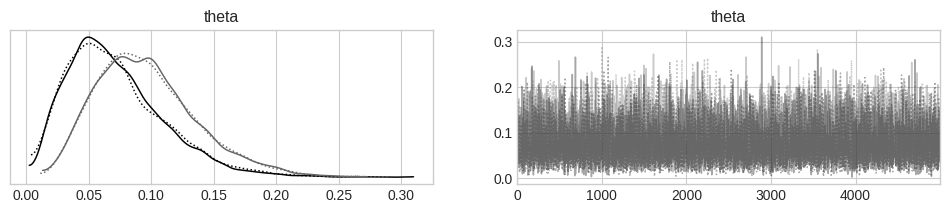

In [8]:
with model:
  pm.plot_trace(trace, ['theta'], compact=True)

In [9]:
# ‰ªÆË™¨ÔºöBÊ°à„ÅÆ„ÇØ„É™„ÉÉ„ÇØÁéá„ÅØAÊ°à„Çà„Çä„ÇÇÂ§ß„Åç„ÅÑ
# ÂÆöÈáèÁöÑË©ï‰æ°ÔºöÊñ∞„Åü„Å™Á¢∫ÁéáÂ§âÊï∞ùõø=Œ∏B-Œ∏A„ÅÆ„Çµ„É≥„Éó„É´„Åå95%„ÅÆÁ¢∫Áéá„ÅßÊ≠£„ÅÆÂÄ§„Å´„Å™„Çã
theta_A = trace.posterior['theta'].sel(theta_dim_0=0).values.flatten()
theta_B = trace.posterior['theta'].sel(theta_dim_0=1).values.flatten()
print((theta_B - theta_A > 0).mean())

0.6782


### „Éú„Éñ„ÅÆ„Éá„Ç∂„Ç§„É≥Ê°àA„Åä„Çà„Å≥B„ÅÆ„ÇØ„É™„ÉÉ„ÇØÁéá„ÅÆ„Çµ„É≥„Éó„É´„ÅÆÂèØË¶ñÂåñ

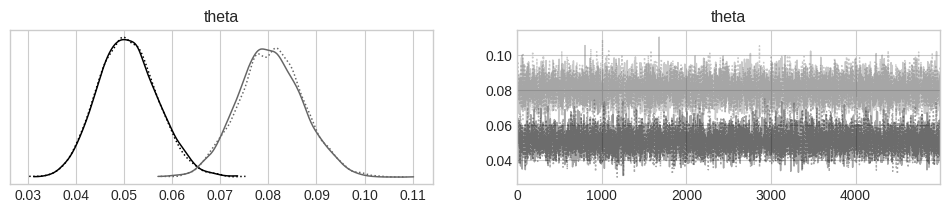

In [10]:
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
  obs = pm.Binomial('obs', p=theta, n=[1280, 1600], observed=[64, 128])
  trace = pm.sample(5000, chains=2)
  pm.plot_trace(trace, ['theta'], compact=True)

In [11]:
# ‰ªÆË™¨ÔºöBÊ°à„ÅÆ„ÇØ„É™„ÉÉ„ÇØÁéá„ÅØAÊ°à„Çà„Çä„ÇÇÂ§ß„Åç„ÅÑ
# ÂÆöÈáèÁöÑË©ï‰æ°ÔºöÊñ∞„Åü„Å™Á¢∫ÁéáÂ§âÊï∞ùõø=Œ∏B-Œ∏A„ÅÆ„Çµ„É≥„Éó„É´„Åå95%„ÅÆÁ¢∫Áéá„ÅßÊ≠£„ÅÆÂÄ§„Å´„Å™„Çã
theta_A = trace.posterior['theta'].sel(theta_dim_0=0).values.flatten()
theta_B = trace.posterior['theta'].sel(theta_dim_0=1).values.flatten()
print((theta_B - theta_A > 0).mean())

0.999


## Áúü„ÅÆ„É¨„Éì„É•„Éº„Çπ„Ç≥„Ç¢

In [12]:
n_a = [20, 10, 36, 91, 170]
data = [0 for _ in range(n_a[0])]
data += [1 for _ in range(n_a[1])]
data += [2 for _ in range(n_a[2])]
data += [3 for _ in range(n_a[3])]
data += [4 for _ in range(n_a[4])]

with pm.Model() as model_a:
  theta = pm.Dirichlet('theta', a=np.array([1, 1, 1, 1, 1]))
  obs = pm.Categorical('obs', p=theta, observed=data)
  trace_a = pm.sample(5000, chains=2)

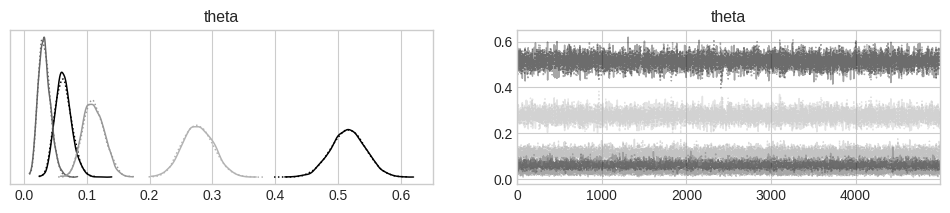

In [ ]:
with model_a:
  pm.plot_trace(trace_a)

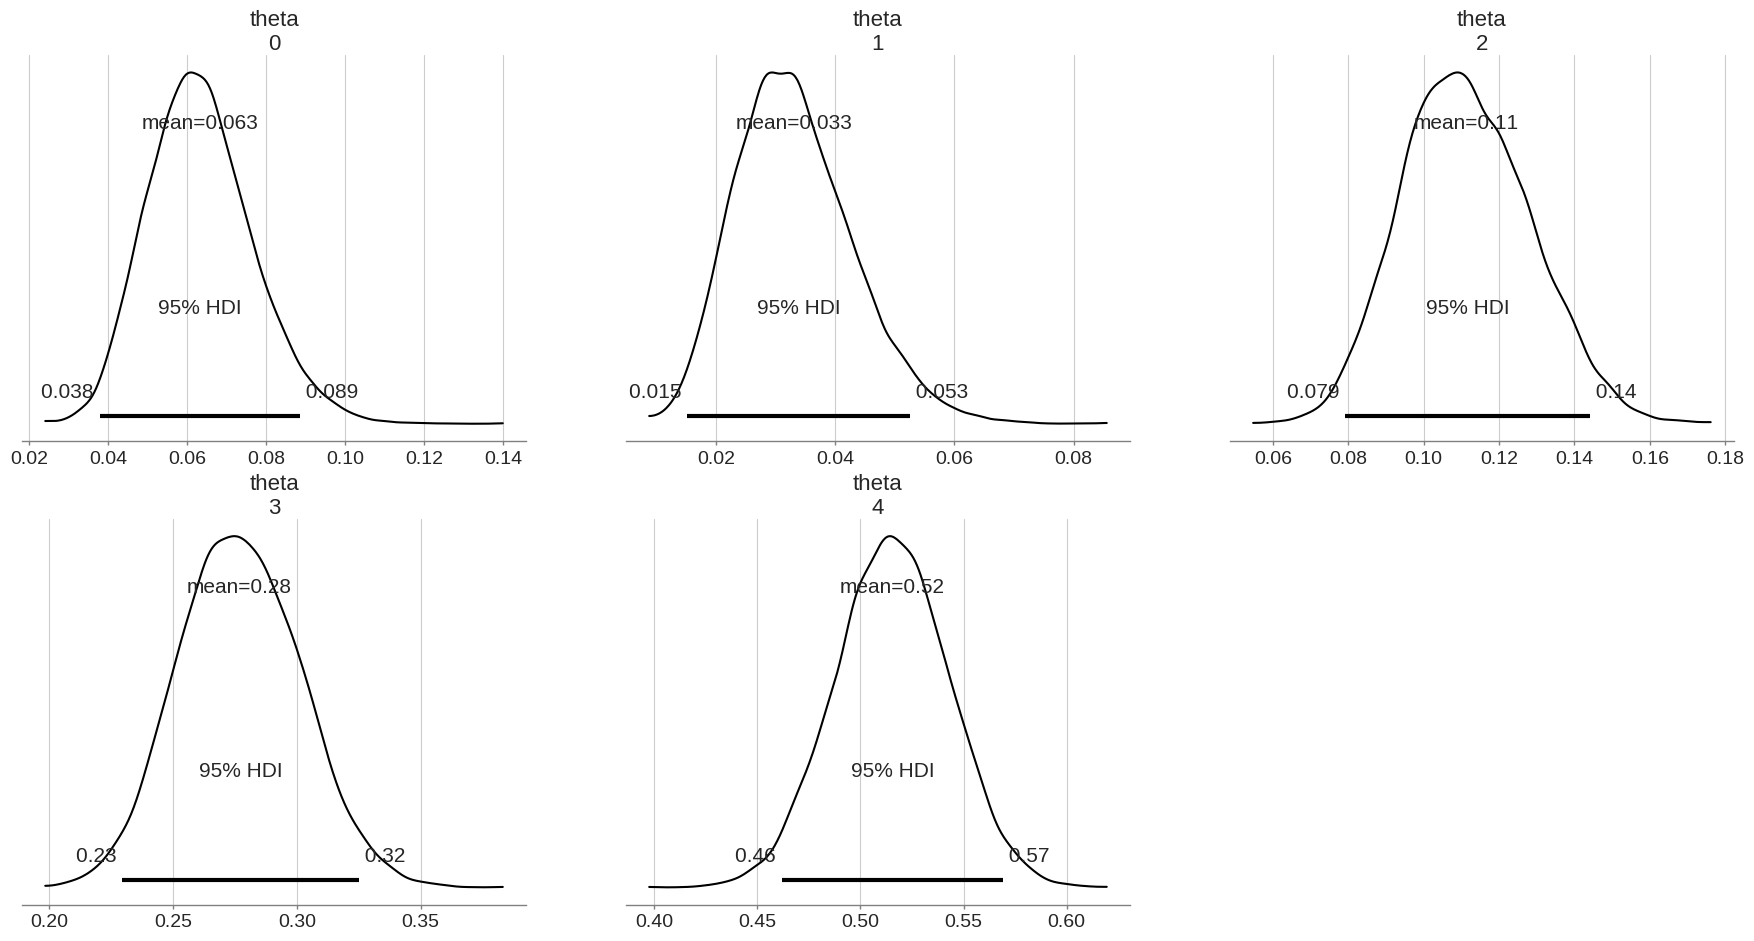

In [ ]:
# ÂïÜÂìÅA„Å´„Å§„ÅÑ„Å¶ÂêÑ„É¨„Éì„É•„Éº„Çπ„Ç≥„Ç¢„ÅåÁîü„ÅøÂá∫„Åï„Çå„ÇãÁ¢∫Áéá  ùúΩ  „ÅÆ‰∫ãÂæåÂàÜÂ∏É„ÅÆÂèØË¶ñÂåñ
with model_a:
  pm.plot_posterior(trace_a, hdi_prob=0.95)

In [ ]:
# „É¨„Éì„É•„Éº„Çπ„Ç≥„Ç¢„ÅÆÂπ≥ÂùáÁÇπ„Å´Áõ∏ÂΩì„Åô„ÇãÊñ∞„Åü„Å™Á¢∫ÁéáÂ§âÊï∞m_a
weights = np.array([1, 2, 3, 4, 5])
m_a = [0] * 10000
for i in range(len(weights)):
  score = weights[i] * trace_a.posterior['theta'].sel(theta_dim_0=i).values.flatten()
  m_a += score

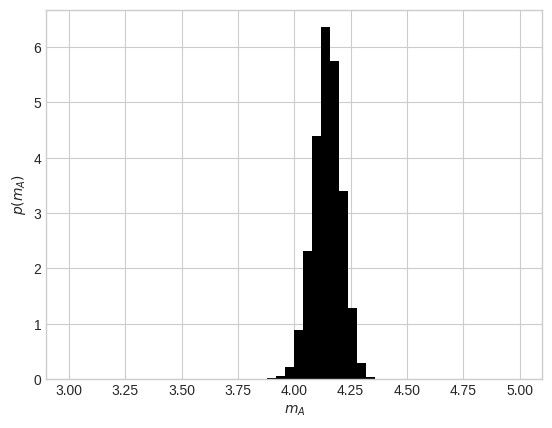

In [ ]:
# ÂïÜÂìÅA„Å´ÂØæ„Åô„Çã„É¨„Éì„É•„Éº„Çπ„Ç≥„Ç¢„ÅÆÂπ≥ÂùáÁÇπ  ùëö  „ÅÆÁ¢∫ÁéáÂØÜÂ∫¶Èñ¢Êï∞
plt.hist(m_a, range=(3, 5), bins=50, density=True)
plt.xlabel(r'$m_A$')
plt.ylabel(r'$p(m_A)$')
plt.show()

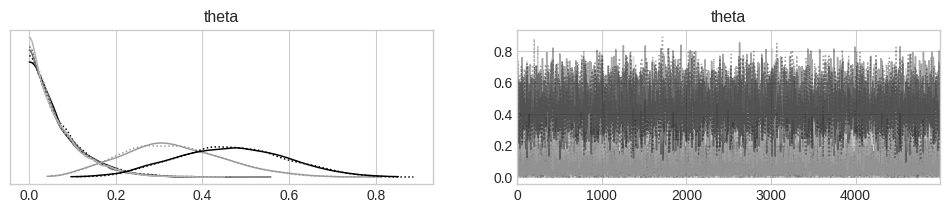

In [ ]:
# ÂïÜÂìÅB„Å´„Å§„ÅÑ„Å¶ÂêÑ„É¨„Éì„É•„Éº„Çπ„Ç≥„Ç¢„ÅåÁîü„ÅøÂá∫„Åï„Çå„ÇãÁ¢∫Áéá  ùúΩ  „ÅÆ„Çµ„É≥„Éó„É´„ÅÆÂèØË¶ñÂåñ
n_b = np.array([0, 0, 4, 0, 6])
with pm.Model() as model_b:
  theta = pm.Dirichlet('theta', a=np.array([1, 1, 1, 1, 1]))
  obs = pm.Multinomial('obs', p=theta, n=n_b.sum(), observed=n_b)
  trace_b = pm.sample(5000, chains=2)
  pm.plot_trace(trace_b)

In [ ]:
# „É¨„Éì„É•„Éº„Çπ„Ç≥„Ç¢„ÅÆÂπ≥ÂùáÁÇπ„Å´Áõ∏ÂΩì„Åô„ÇãÊñ∞„Åü„Å™Á¢∫ÁéáÂ§âÊï∞m_b
weights = np.array([1, 2, 3, 4, 5])
m_b = [0] * 10000
for i in range(len(weights)):
  score = weights[i] * trace_b.posterior['theta'].sel(theta_dim_0=i).values.flatten()
  m_b += score

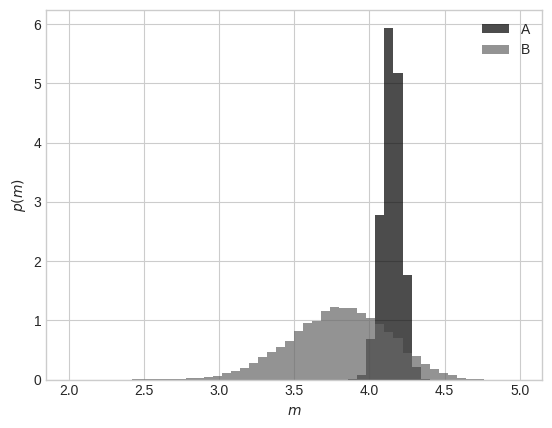

In [ ]:
# ÂïÜÂìÅA„Å®B„ÅÆ„É¨„Éì„É•„Éº„Çπ„Ç≥„Ç¢„ÅÆÂπ≥ÂùáÁÇπ„ÅÆÁ¢∫ÁéáÂØÜÂ∫¶Èñ¢Êï∞
plt.hist(m_a, range=(2, 5), bins=50, density=True, label='A',
         alpha=0.7)
plt.hist(m_b, range=(2, 5), bins=50, density=True, label='B',
         alpha=0.7)
plt.xlabel(r'$m$')
plt.ylabel(r'$p(m)$')
plt.legend()
plt.show()

## ÊªûÂú®ÊôÇÈñì„Çí„ÉÜ„Çπ„Éà„Åô„Çã

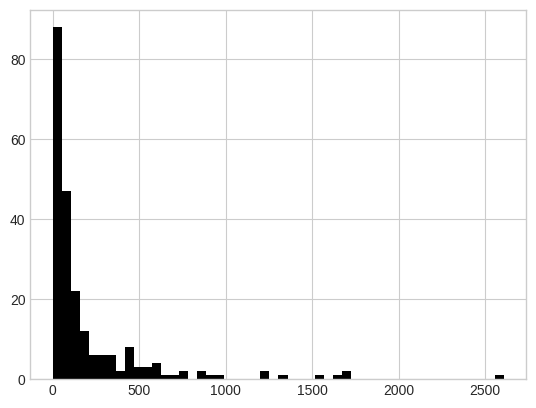

In [ ]:
# „ÅÇ„Çã„Ç¶„Çß„Éñ„Çµ„Ç§„Éà„Å´„Åä„Åë„ÇãÊªûÂú®ÊôÇÈñìÔºàÁßíÔºâ„ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†
import urllib
url = 'https://www.oreilly.co.jp/pub/9784873119168/data/time-on-page.csv'
response = urllib.request.urlopen(url)
data = [int(row.strip()) for row in response.readlines()]
plt.hist(data, bins=50)
plt.show()

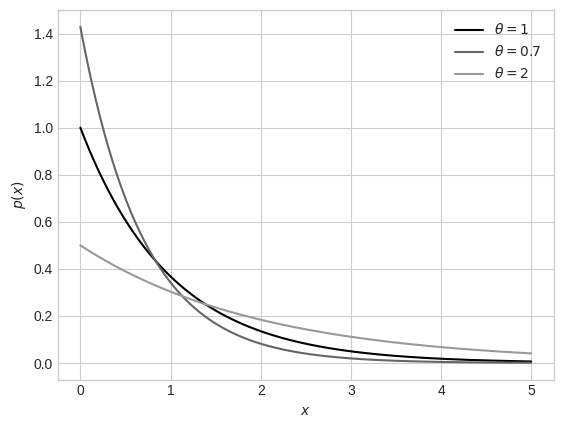

In [ ]:
# „Åï„Åæ„Åñ„Åæ„Å™ÊåáÊï∞ÂàÜÂ∏É„ÅÆ‰æã
from scipy import stats
xs = np.linspace(0, 5, 1001)
plt.plot(xs, stats.expon.pdf(xs, 0, 1), label=r'$\theta = 1$')
plt.plot(xs, stats.expon.pdf(xs, 0, 0.7), label=r'$\theta = 0.7$')
plt.plot(xs, stats.expon.pdf(xs, 0, 2), label=r'$\theta = 2$')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.legend()
plt.show()

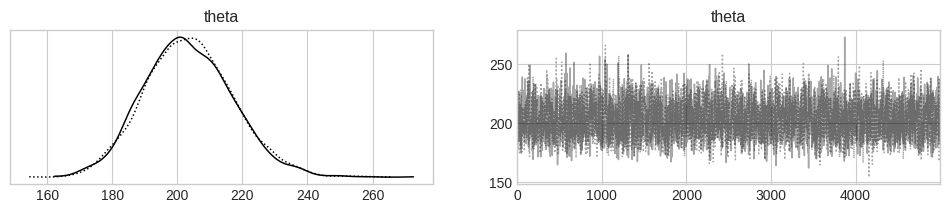

In [ ]:
# Á¢∫ÁéáÂ§âÊï∞  ùúÉ  „ÅÆ„Çµ„É≥„Éó„É´„ÅÆËªåË∑°
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=3000)
  obs = pm.Exponential('obs', lam=1/theta, observed=data)
  trace = pm.sample(5000, chains=2)
  pm.plot_trace(trace)

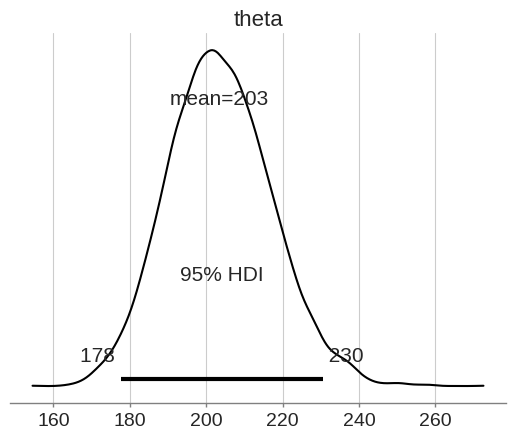

In [ ]:
# Á¢∫ÁéáÂ§âÊï∞  ùúÉ  „ÅÆ‰∫ãÂæåÂàÜÂ∏É
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

**„ÅÇ„ÇãÊìç‰Ωú„ÇíÂä†„Åà„Çã„Åì„Å®„ÅßWeb„Çµ„Ç§„Éà„ÅÆÊªûÂú®ÊôÇÈñì„Åå„ÅÆ„Å≥Â§™„Åì„Å®„ÇíÁ¢∫„Åã„ÇÅ„Åü„ÅÑ„ÅÆ„Å™„Çâ„ÄÅ„Åì„ÅÆÁ¢∫ÁéáÂ§âÊï∞Œ∏„ÅÆ‰∫ãÂæåÂàÜÂ∏É„Åã„ÇâÂ∞é„ÅçÂá∫„Åï„Çå„ÇãÁµ±Ë®àÈáè„ÇíÊØîËºÉ„Åó„Å¶ÂÆöÈáèÁöÑ„Å´Ë©ï‰æ°„Åô„Çå„Å∞ËâØ„ÅÑ„ÄÇ**

## „Å™„Åú„Éô„Ç§„Ç∫Êé®Ë´ñ„Å´„Çà„ÇãÁµ±Ë®àÁöÑ‰ªÆË™¨Ê§úÂÆö„ÇíË°å„ÅÜ„Åã

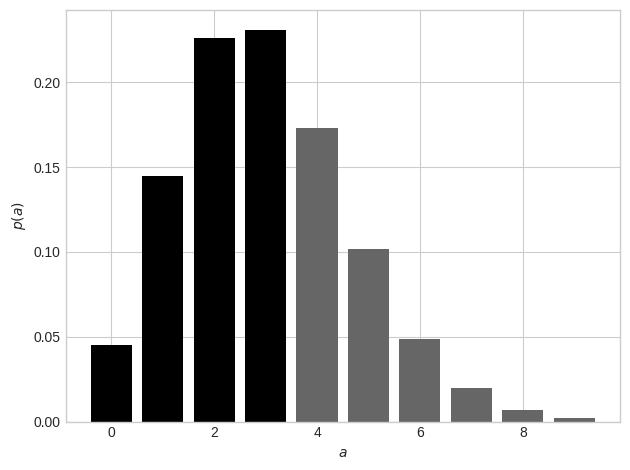

In [ ]:
# „Ç¢„É™„Çπ„ÅÆ„É¨„Éù„Éº„Éà„Å´„Åä„Åë„Çã„ÇØ„É™„ÉÉ„ÇØÊï∞„ÅÆÊ®ôÊú¨ÂàÜÂ∏É„ÄÇ ÂêàË®à„ÇØ„É™„ÉÉ„ÇØÊï∞  ùëé  „Åå4‰ª•‰∏ä„Å®„Å™„ÇãÈÉ®ÂàÜ„ÇíÁï∞„Å™„ÇãËâ≤„ÅßÁ§∫„Åó„Åü„ÄÇ
x = 10
N = 50
theta = 0.06
thres = 4
plt.bar(range(thres), stats.binom.pmf(range(thres), N, theta), linewidth=0)
plt.bar(range(thres, x), stats.binom.pmf(range(thres, x), N, theta), linewidth=0)
plt.xlabel(r'$a$')
plt.ylabel(r'$p(a)$')
plt.tight_layout()
plt.show()

In [ ]:
# ùëé  „Åå thres ‰ª•‰∏ä„ÅÆÂÄ§„ÇíÂèñ„ÇãÁ¢∫Áéá
stats.binom.pmf(range(thres, 10000), N, theta).sum()

0.35269662790368267

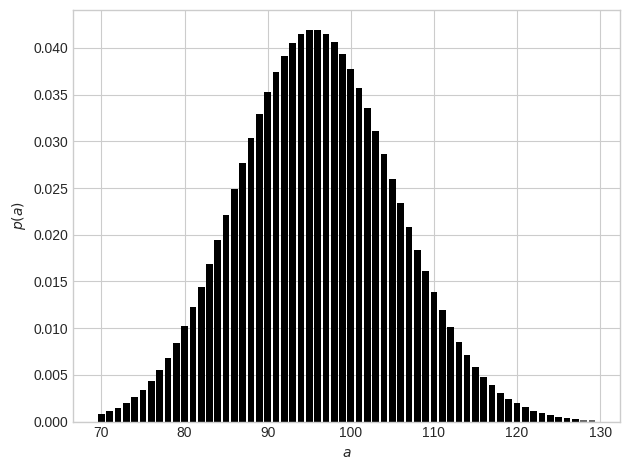

In [ ]:
# „Éú„Éñ„ÅÆ„É¨„Éù„Éº„Éà„Å´„Åä„Åë„Çã„ÇØ„É™„ÉÉ„ÇØÊï∞„ÅÆÊ®ôÊú¨ÂàÜÂ∏É„ÄÇÂêàË®à„ÇØ„É™„ÉÉ„ÇØÊï∞  ùëé  „Åå128‰ª•‰∏ä„Å®„Å™„ÇãÈÉ®ÂàÜ„ÇíÁï∞„Å™„ÇãËâ≤„ÅßÁ§∫„Åó„Åü„ÄÇ
minx = 70
x = 130
N = 1600
theta = 0.06
thres = 128
plt.bar(range(minx, thres), stats.binom.pmf(range(minx, thres), N, theta), linewidth=0)
plt.bar(range(thres, x), stats.binom.pmf(range(thres, x), N, theta), linewidth=0)
plt.xlabel(r'$a$')
plt.ylabel(r'$p(a)$')
plt.tight_layout()
plt.show()

In [ ]:
# ùëé  „Åå thres ‰ª•‰∏ä„ÅÆÂÄ§„ÇíÂèñ„ÇãÁ¢∫Áéá
stats.binom.pmf(range(thres, 10000), N, theta).sum()

0.0007341521761379321